# Matrix Analysis 2022 - EE312

## Week 4 - Image deblurring using right inverse
[LTS2](https://lts2.epfl.ch)

### Objectives
In this week's exercises you will need to use the properties of the four fundamental subspaces, as well as the left and right inverse of a matrix. The right inverse will be applied in an example to recover an image that has been degraded by a blurring operator.


## Exercises
Exercises are mandatory for BA6 students, optional (but yet highly recommended) for BA4 students.
### 1.
Let $A \in \mathbb{R}^{m \times n}$ and suppose it has a left-inverse. Prove that $A^T$ has a right-inverse.
### 2.
Let $A=\begin{pmatrix}1 & 1 & 1 &0\\1 & 2 & 2 & 1\\2 & 5 & 5 & 3\end{pmatrix}$

Compute a basis for each of its four fundamental subspaces.

## Image deblurring 
### Introduction
Since we will need to visualize images, just a brief reminder on how to use matplotlib for this task

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io
import os

We will use the `imread` function from the `scikit-image` package (pre-installed on noto, make sure to install it if you are using a local environment)

In [2]:
filename = os.path.join(skimage.data_dir, 'camera.png')
camera = skimage.io.imread(filename)

Some basic information regarding the contents of `camera`:

In [3]:
camera.shape

(512, 512)

In [4]:
camera.dtype

dtype('uint8')

The type `uint8` means each value in `camera` is represented using a single byte, and is within $[0, 255]$.

Displaying the image is fairly straightforward :

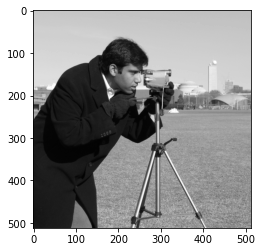

In [5]:
plt.imshow(camera, cmap='gray')

The image here is widely used in many image processing scientific publications.

The `cmap` parameter specifies the colormap used to display the image. Matplotlib default colormap not being grayscale, passing `cmap='gray'` is needed. You can find [several predefined colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) in Matplotlib. 

You can also check the images distributed with `scikit-image` on their [github repository](https://github.com/scikit-image/scikit-image/tree/main/skimage/data). Feel free to use another image, or even one of your own.

## 1. Blurring operator

In order to efficiently deblur an image, let us design our own blurring operator. Since it will be entirely known, it will be possible to compute its inverse.

Let us consider an input vector $x=\begin{pmatrix}x_0 \\ x_1 \\ ... \\ x_{N-1}\end{pmatrix} \in \mathbb{R}^N$. 

Our blurring operator $B$ will do two things:
- replace each value $x_k$ by the average of $2p+1$ values surrounding $x_k$, i.e. between $x_{k-p}$ and $x_{k+p}$.
- compute this average not for every $x_k$ but only every $s$ values, with $s$ being a subsampling factor, $s>0$.

Formally, if we denote by $y$ the output of the blurring operator on $x$, this means that
- $y\in\mathbb{R}^M$, with $M=\frac{N}{s}$ (NOTE: we will only consider the case where $N$ is a mutiple of $s$)
- $y_m = \frac{1}{2p+1}\sum_{k=sm-p}^{sm+p}x_k$

As you may have noticed, our summation indices in the definition of $y_m$ can be negative in some cases and bigger than $N-1$ in others. In those cases the missing value of $x_k$ is replaced by 0. This way of handling borders is often referred to as **zero-padding**, as it can be achieved by creating an extended version of $x$ with a number of leading and trailing zeros. There are other ways of handling borders, e.g. by using $x_0$ for negative indices and $x_{N-1}$ for indices greater than $N-1$, or even by mirroring the input vector.

Write a function that creates the matrix $B$ that performs the operations described above.

Remember that in python the `//` operator performs the integer division.

In [ ]:
def blur_matrix(N, p, s):
    # your code here
    return None

What is the rank of $B$ ? (row-rank might be easier to consider) 

## 2. Blurring the image

We now have our blurring matrix ready, let us use it to blur the `camera` image.
As $B$ is designed to operate on vectors, we will need two steps to blur the image
- apply $B$ on each column of the input image
- apply $B$ on each row of the column-blurred image computed above

In [ ]:
# build the blur matrix
B = blur_matrix(512, 8, 4)

In [ ]:
# Blur on columns
camera_c = # your code here

In [ ]:
plt.imshow(camera_c) # check the result

In [ ]:
# Blur on rows
camera_blurred = # your code here

In [ ]:
plt.imshow(camera_blurred) # check the result

## 3. Deblurring
Now everything is setup, we can proceed with the image restoration. 

Let us denote the result of a blur operation by $y=Bx$. Show that $x^* = B_R^{-1}y$, where $B_R^{-1}$ is the right-inverse of $B$, is an admissible value for $x$ to satisfy $y=Bx$.

*your answer here*

Compute the right inverse of the blur matrix. Reminder from the lectures: $A_R^{-1} = A^T(AA^T)^{-1}$. 

You can use `np.linalg.inv` to perform the inverse of a matrix.

In [ ]:
BR_inv = # your code here

Using this $x^*$, compute the reconstructed image from the blurred one (do not forget to apply it on the rows, then on the columns)

In [ ]:
camera_unblur_row = # your code here

In [ ]:
plt.imshow(camera_unblur_row) # check the result

In [ ]:
camera_unblur = # your code here

In [ ]:
plt.imshow(camera_unblur) # check the result